# Introduction

### This project is made to predict how many people will visit the theater on a given day. We will be using the "audience_count" from the table "Booknow visits" to predict this.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv


# Import libraries & Load the dataset

In [2]:
# Import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# suppress the warnings
import warnings
warnings.filterwarnings('ignore')

# display settings
pd.set_option('display.max_columns',100)
pd.set_option('display.width',100)
from IPython.display import display

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# metrics and validation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV

print('All Libraries Importedddd!!!')

All Libraries Importedddd!!!


In [3]:
# Load all the dataset files

# Load theatre information
cinePOS_theaters = pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv')
booknow_theaters = pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv')

# Load mapping file
movie_theater_id_relation = pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv')

# Load booking data
cinePOS_booking = pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv')
booknow_booking = pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv')

# Load visits data (target variable)
booknow_visits = pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv')

# Load date info
date_info = pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv')

# Load submission format
sample_submission = pd.read_csv('/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv')

print("All datasets loaded successfullyyy!!!!!")


All datasets loaded successfullyyy!!!!!


# Perform Exploratory Data Analysis

### Get basic understanding for each table present in our dataset:
1. shape of the table (no. of rows and columns)
2. Name of all the columns
3. data type of all the columns
4. first 3 rows to get a basic idea of how the table looks
5. Getting an idea of how many missing values each column has
6. getting basic stats for all the columns (numeric and categorical both)
7. basic info about the table and its columns

In [4]:
# Display shape, column names, their datatypes, missing values, and top few rows for each dataset
datasets = {
    'CinePOS Theaters': cinePOS_theaters,
    'BookNow Theaters': booknow_theaters,
    'Theater ID Relation': movie_theater_id_relation,
    'CinePOS Booking': cinePOS_booking,
    'BookNow Booking': booknow_booking,
    'BookNow Visits': booknow_visits,
    'Date Info': date_info,
    'Sample Submission': sample_submission
}

# iterate over each item in the dictionary to reveal their metadata
for name, dataset in datasets.items():
    print(f"\n{'-'*50}")
    print(f"Dataset: {name}")
    print(f"{'-'*50}")
    
    print(f"Shape: {dataset.shape}")
    
    print(f"\nColumn names: {list(dataset.columns)}")
    
    print(f"\nData types:")
    print(dataset.dtypes)
    
    print(f"\nFirst 3 rows:")
    display(dataset.head(3))
    
    missing = dataset.isnull().sum()
    print("\nMissing values:")
    print(missing[missing > 0])
    
    print ('\nBasic stats for the table:')
    print(dataset.describe(include='all'))

    print("\nInfo:")
    print(dataset.info())





--------------------------------------------------
Dataset: CinePOS Theaters
--------------------------------------------------
Shape: (4690, 5)

Column names: ['cine_theater_id', 'theater_type', 'theater_area', 'latitude', 'longitude']

Data types:
cine_theater_id     object
theater_type        object
theater_area        object
latitude           float64
longitude          float64
dtype: object

First 3 rows:


,cine_theater_id,theater_type,theater_area,latitude,longitude
0,cinePOS_05466,Other,Area_104,22.619233,78.113017
1,cinePOS_08708,Other,Area_104,22.619233,78.113017
2,cinePOS_00753,Other,Area_104,22.619233,78.113017



Missing values:
latitude     3861
longitude    3861
dtype: int64

Basic stats for the table:
       cine_theater_id theater_type theater_area    latitude   longitude
count             4690         4690         4690  829.000000  829.000000
unique            4690            3          119         NaN         NaN
top      cinePOS_05466        Other     Area_119         NaN         NaN
freq                 1         3941          257         NaN         NaN
mean               NaN          NaN          NaN   23.000000   79.000000
std                NaN          NaN          NaN    0.833863    1.460388
min                NaN          NaN          NaN   22.025970   76.112098
25%                NaN          NaN          NaN   22.619233   78.170501
50%                NaN          NaN          NaN   23.004410   79.908065
75%                NaN          NaN          NaN   23.018784   79.934515
max                NaN          NaN          NaN   26.349436   81.743235

Info:
<class 'pandas.core.fra

,book_theater_id,theater_type,theater_area,latitude,longitude
0,book_00093,Drama,Area_001,22.619233,78.113017
1,book_00078,Drama,Area_001,22.619233,78.113017
2,book_00291,Drama,Area_001,22.619233,78.113017



Missing values:
book_theater_id    515
dtype: int64

Basic stats for the table:
       book_theater_id theater_type theater_area    latitude   longitude
count              314          829          829  829.000000  829.000000
unique             314            4          103         NaN         NaN
top         book_00093        Other     Area_003         NaN         NaN
freq                 1          411           64         NaN         NaN
mean               NaN          NaN          NaN   23.000000   79.000000
std                NaN          NaN          NaN    0.833863    1.460388
min                NaN          NaN          NaN   22.025970   76.112098
25%                NaN          NaN          NaN   22.619233   78.170501
50%                NaN          NaN          NaN   23.004410   79.908065
75%                NaN          NaN          NaN   23.018784   79.934515
max                NaN          NaN          NaN   26.349436   81.743235

Info:
<class 'pandas.core.frame.DataFrame'

,book_theater_id,cine_theater_id
0,book_00509,cinePOS_01261
1,book_00063,cinePOS_02467
2,book_00054,cinePOS_08923



Missing values:
Series([], dtype: int64)

Basic stats for the table:
       book_theater_id cine_theater_id
count              150             150
unique             150             150
top         book_00509   cinePOS_01261
freq                 1               1

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   book_theater_id  150 non-null    object
 1   cine_theater_id  150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB
None

--------------------------------------------------
Dataset: CinePOS Booking
--------------------------------------------------
Shape: (1641966, 4)

Column names: ['cine_theater_id', 'show_datetime', 'booking_datetime', 'tickets_sold']

Data types:
cine_theater_id     object
show_datetime       object
booking_datetime    object
tickets_sold         int64
dtype: object

First 3 rows:


,cine_theater_id,show_datetime,booking_datetime,tickets_sold
0,cinePOS_00001,2023-01-01 11:00:00,2023-01-01 09:00:00,1
1,cinePOS_00002,2023-01-01 13:00:00,2023-01-01 06:00:00,3
2,cinePOS_00003,2023-01-01 16:00:00,2023-01-01 14:00:00,2



Missing values:
Series([], dtype: int64)

Basic stats for the table:
       cine_theater_id        show_datetime     booking_datetime  tickets_sold
count          1641966              1641966              1641966  1.641966e+06
unique           13161                 8283                10152           NaN
top      cinePOS_03019  2023-12-16 19:00:00  2023-12-12 21:00:00           NaN
freq               921                10528                  907           NaN
mean               NaN                  NaN                  NaN  4.987345e+00
std                NaN                  NaN                  NaN  5.234901e+00
min                NaN                  NaN                  NaN  1.000000e+00
25%                NaN                  NaN                  NaN  2.000000e+00
50%                NaN                  NaN                  NaN  3.000000e+00
75%                NaN                  NaN                  NaN  6.000000e+00
max                NaN                  NaN                  

,book_theater_id,show_datetime,booking_datetime,tickets_booked
0,book_00244,2023-01-01 19:00:00,2023-01-01 16:00:00,1
1,book_00740,2023-01-01 19:00:00,2023-01-01 19:00:00,3
2,book_00740,2023-01-01 19:00:00,2023-01-01 19:00:00,6



Missing values:
Series([], dtype: int64)

Basic stats for the table:
       book_theater_id        show_datetime     booking_datetime  tickets_booked
count            68336                68336                68336    68336.000000
unique             301                 3866                 6351             NaN
top         book_00712  2023-12-24 19:00:00  2023-11-24 18:00:00             NaN
freq              1832                  255                  106             NaN
mean               NaN                  NaN                  NaN        4.425808
std                NaN                  NaN                  NaN        4.808945
min                NaN                  NaN                  NaN        1.000000
25%                NaN                  NaN                  NaN        2.000000
50%                NaN                  NaN                  NaN        3.000000
75%                NaN                  NaN                  NaN        5.000000
max                NaN                 

,book_theater_id,show_date,audience_count
0,book_00001,2023-01-13,50
1,book_00001,2023-01-14,64
2,book_00001,2023-01-15,58



Missing values:
Series([], dtype: int64)

Basic stats for the table:
       book_theater_id   show_date  audience_count
count           214046      214046   214046.000000
unique             826         424             NaN
top         book_00528  2023-11-18             NaN
freq               424         783             NaN
mean               NaN         NaN       41.616568
std                NaN         NaN       32.834918
min                NaN         NaN        2.000000
25%                NaN         NaN       18.000000
50%                NaN         NaN       34.000000
75%                NaN         NaN       58.000000
max                NaN         NaN     1350.000000

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214046 entries, 0 to 214045
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   book_theater_id  214046 non-null  object
 1   show_date        214046 non-null  object
 2   audience_cou

,show_date,day_of_week
0,2023-01-01,Sunday
1,2023-01-02,Monday
2,2023-01-03,Tuesday



Missing values:
Series([], dtype: int64)

Basic stats for the table:
         show_date day_of_week
count          547         547
unique         547           7
top     2023-01-01      Sunday
freq             1          79

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   show_date    547 non-null    object
 1   day_of_week  547 non-null    object
dtypes: object(2)
memory usage: 8.7+ KB
None

--------------------------------------------------
Dataset: Sample Submission
--------------------------------------------------
Shape: (38062, 2)

Column names: ['ID', 'audience_count']

Data types:
ID                object
audience_count     int64
dtype: object

First 3 rows:


,ID,audience_count
0,book_00001_2024-03-01,0
1,book_00001_2024-03-02,0
2,book_00001_2024-03-03,0



Missing values:
Series([], dtype: int64)

Basic stats for the table:
                           ID  audience_count
count                   38062         38062.0
unique                  38062             NaN
top     book_00001_2024-03-01             NaN
freq                        1             NaN
mean                      NaN             0.0
std                       NaN             0.0
min                       NaN             0.0
25%                       NaN             0.0
50%                       NaN             0.0
75%                       NaN             0.0
max                       NaN             0.0

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38062 entries, 0 to 38061
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              38062 non-null  object
 1   audience_count  38062 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 594.8+ KB
None


# Missing value understanding

### list out the amout of missing values for each column in each table

In [5]:
# Check for missing values in each dataset
print("Missing Values Analysis:")
print("-"*30)

for name, dataset in datasets.items():
    missing_count = dataset.isnull().sum()
    missing_percent = (missing_count / len(dataset)) * 100
    
    print(f"\n{name}:")
    if missing_count.sum() == 0:
        print(" -> No missing values")
    else:
        print(f" ->  Missing values found:")
        for col in missing_count[missing_count > 0].index:
            print(f"    {col}: {missing_count[col]} ({missing_percent[col]:.2f}%)")


Missing Values Analysis:
------------------------------

CinePOS Theaters:
 ->  Missing values found:
    latitude: 3861 (82.32%)
    longitude: 3861 (82.32%)

BookNow Theaters:
 ->  Missing values found:
    book_theater_id: 515 (62.12%)

Theater ID Relation:
 -> No missing values

CinePOS Booking:
 -> No missing values

BookNow Booking:
 -> No missing values

BookNow Visits:
 -> No missing values

Date Info:
 -> No missing values

Sample Submission:
 -> No missing values


* Most of the tabes do not have any missing values, but latitude and longitude is missing from most of the entries, so we will fill them with median values and not rely on them. 

* In the booknow theaters, we are able to get the idea that not all theaters are mapped directly. Some that are present in cinePOS are not in BookNow and vice versa.* 

# Understanding the target

i.e, booknow_visits table because it contains the column: "audience_count", which we want to predict

Mean Audience: 41.62
Median Audience: 34.00
Std Dev: 32.83
Min Audience: 2
Max Audience: 1350
Zero audience days: 0


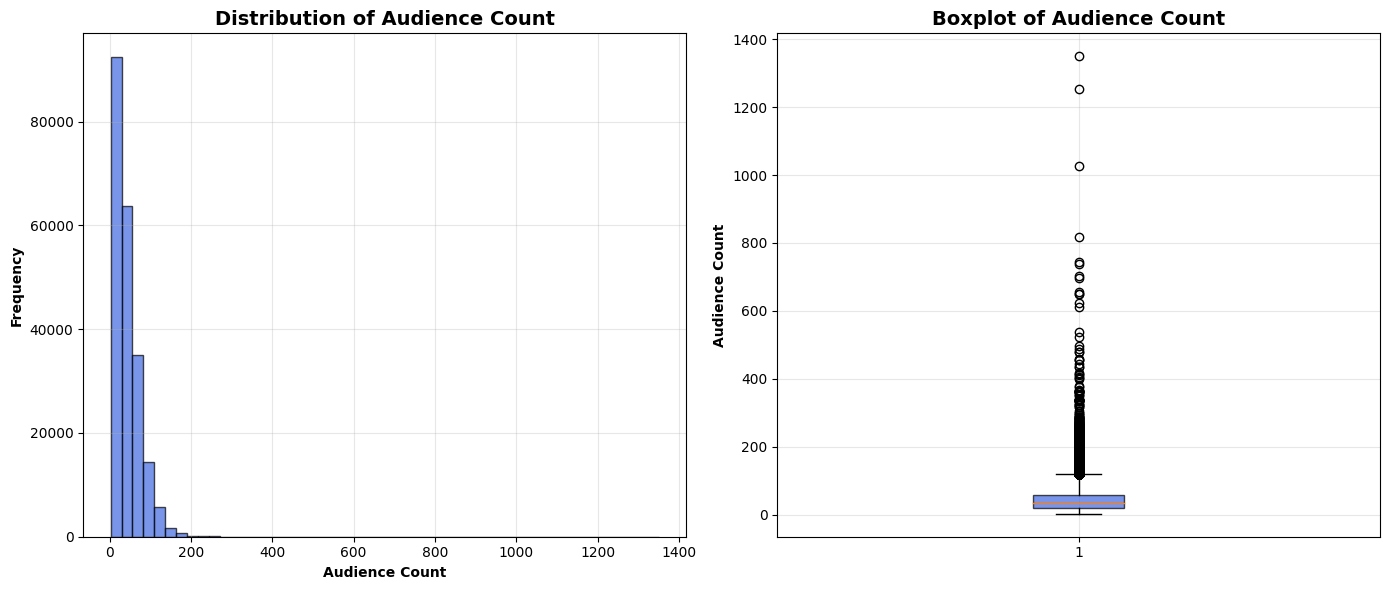

In [6]:
# basic stats about the target variable

print(f"Mean Audience: {booknow_visits['audience_count'].mean():.2f}") # Avg amount of audience that shows up
print(f"Median Audience: {booknow_visits['audience_count'].median():.2f}")  # Middle value of audience counts
print(f"Std Dev: {booknow_visits['audience_count'].std():.2f}")     # How much audience nos vary from day to day
print(f"Min Audience: {booknow_visits['audience_count'].min()}")    # min amount shows up (more than 0)
print(f"Max Audience: {booknow_visits['audience_count'].max()}")    # most amount of audience shows up
print(f"Zero audience days: {(booknow_visits['audience_count'] == 0).sum()}")  # no audience shows up at theater


# visualize distrubution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(booknow_visits['audience_count'], bins=50, color='royalblue', alpha=0.7, edgecolor='black')
plt.xlabel('Audience Count', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribution of Audience Count', fontweight='bold', fontsize=14)
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(booknow_visits['audience_count'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='royalblue', alpha=0.7))
plt.ylabel('Audience Count', fontweight='bold')
plt.title('Boxplot of Audience Count', fontweight='bold', fontsize=14)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

1. The histogram shows the overall distribution of audience counts.
2. Based on the histogram, we can clearly see that most values lie in the lower range (0–150), indicating the data is right-skewed.
3. The boxplot shows us the outliers in the dataset clearly, it confirms that even though the majority of audience counts cluster within a small range, there are many high-value spikes, showing heavy right skew
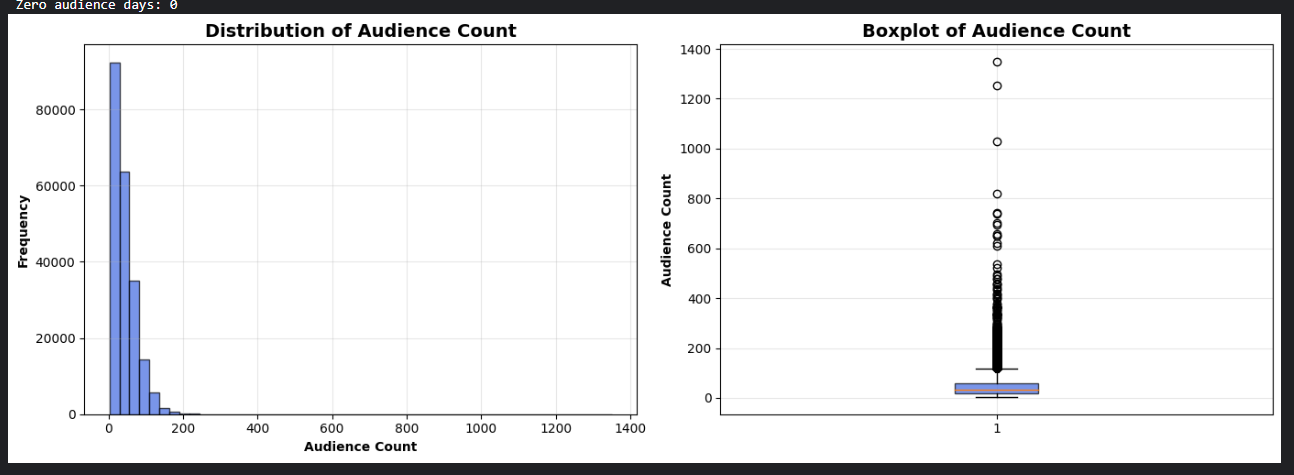

## Date Analysis

Since the dates in the tables are object(treated as strings), we are converting them into datetime so that it can be used for extracting data and training models. 

then we merge the booknow visits and the date info table so that we get an idea of how the bookings vary on diff days of the week.

In [7]:
# date analysis - time-series patterns

# convert the objects to datetime 
booknow_visits['show_date'] = pd.to_datetime(booknow_visits['show_date'])
date_info['show_date'] = pd.to_datetime(date_info['show_date'])

# check if any of the date was malformed (conversions will turn into NA)
print(f"Booknow visits null values: {booknow_visits['show_date'].isna().sum()}")
print(f"Date info null values: {date_info['show_date'].isna().sum()}")


# merge date info with visits
# Creating a new dataset that contains original visit data + extra date based features from date_info
train_with_dates = booknow_visits.merge(date_info, on='show_date', how='left')


print('\nDate features analysis:\n')
display(train_with_dates.head())

Booknow visits null values: 0
Date info null values: 0

Date features analysis:



,book_theater_id,show_date,audience_count,day_of_week
0,book_00001,2023-01-13,50,Friday
1,book_00001,2023-01-14,64,Saturday
2,book_00001,2023-01-15,58,Sunday
3,book_00001,2023-01-16,44,Monday
4,book_00001,2023-01-18,12,Wednesday


## Analyze patterns by day of week

We need to get an idea of how many people turn out at what day of the week, since that will be helpful in predicting footfall.


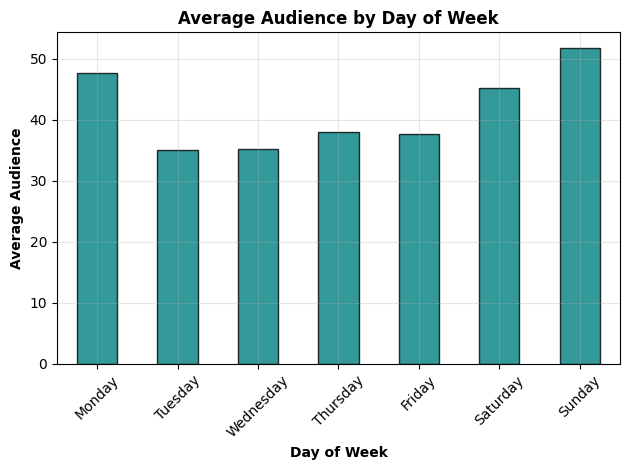

In [8]:
# Analyze patterns by day of week

plt.figure()

# group by day of week and calculate its mean
day_avg = train_with_dates.groupby('day_of_week')['audience_count'].mean()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# reorder values according to day_order
day_avg = day_avg.reindex(day_order)
day_avg.plot(kind='bar', color='teal', alpha=0.8, edgecolor='black') # this alpha is transparency of bars

plt.xlabel('Day of Week', fontweight='bold')
plt.ylabel('Average Audience', fontweight='bold')
plt.title('Average Audience by Day of Week', fontweight='bold')
plt.xticks(rotation=45)  # rotate x-axis labels
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Weekends have more audience on average (as expected) compared to weekdays.   
but mondays also have a lot more on average as compared to other weekdays, which is a surprising thing to know

## Theater Analysis

Here, we explore the theaters from both BookNow and CinePOS datasets to understand how many theaters exist and how they are categorized.
We also merge theater information into our main training dataset to enrich it with theater attributes.

In [9]:
# Theater analysis
print("Theater Analysis:\n")

# total no of booknow theaters and how many of each
print(f"Total BookNow Theaters: {booknow_theaters['book_theater_id'].nunique()}")
print(f"\nBookNow Theater Types:")
print(booknow_theaters['theater_type'].value_counts())

print('\n\n')

# total no of cinepos theaters and how many of each
print(f"\nTotal CinePOS Theaters: {cinePOS_theaters['cine_theater_id'].nunique()}")
print(f"\nCinePOS Theater Types:")
print(cinePOS_theaters['theater_type'].value_counts())

# Merge theater info (keep all audience records, attach theater info) 
# (booknow visits, date info and booknow theaters)
train_full = train_with_dates.merge(booknow_theaters, on='book_theater_id', how='left')

print("\n\nTable: train_full")
display(train_full.head())

print("Rows with missing theater_type after merge:", train_full['theater_type'].isna().sum())


Theater Analysis:

Total BookNow Theaters: 314

BookNow Theater Types:
theater_type
Other     411
Comedy    196
Drama     183
Action     39
Name: count, dtype: int64




Total CinePOS Theaters: 4690

CinePOS Theater Types:
theater_type
Other     3941
Drama      705
Action      44
Name: count, dtype: int64


Table: train_full


,book_theater_id,show_date,audience_count,day_of_week,theater_type,theater_area,latitude,longitude
0,book_00001,2023-01-13,50,Friday,Drama,Area_002,23.00441,79.934515
1,book_00001,2023-01-14,64,Saturday,Drama,Area_002,23.00441,79.934515
2,book_00001,2023-01-15,58,Sunday,Drama,Area_002,23.00441,79.934515
3,book_00001,2023-01-16,44,Monday,Drama,Area_002,23.00441,79.934515
4,book_00001,2023-01-18,12,Wednesday,Drama,Area_002,23.00441,79.934515


Rows with missing theater_type after merge: 133896


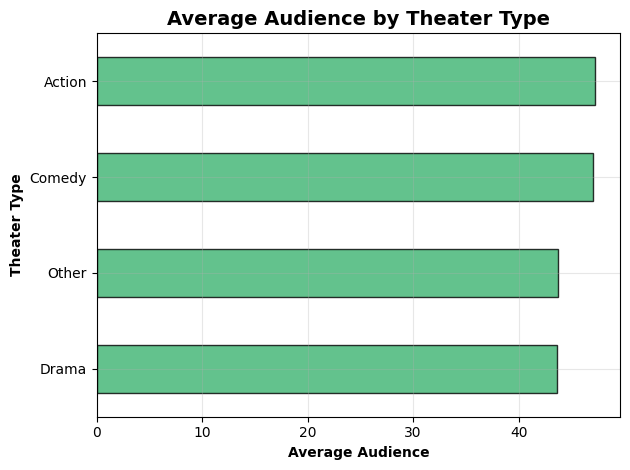

In [10]:
# Avg amount of audience per theater type
plt.figure()
theater_avg = train_full.groupby('theater_type')['audience_count'].mean().sort_values()
theater_avg.plot(kind='barh', color='mediumseagreen', alpha=0.8, edgecolor='black')
plt.xlabel('Average Audience', fontweight='bold')
plt.ylabel('Theater Type', fontweight='bold')
plt.title('Average Audience by Theater Type', fontweight='bold', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Prepare booking data for predictions

1. convert the object data type to pandas datetime64
2. convert only show-date to python date because prediction happens at the day level and not time
3. convert only date back to pandas datetime64

output - Pandas datetime64 but only with the dates (because we use date and not time to predict the output)


Now we have only dates of show time in pandas which is necessary for predictions and can work with various of tools like feature extraction, merge, sort, etc



In [11]:
# Prepare booking data

# convert onject to datetime
cinePOS_booking['show_datetime'] = pd.to_datetime(cinePOS_booking['show_datetime'])
cinePOS_booking['booking_datetime'] = pd.to_datetime(cinePOS_booking['booking_datetime'])

# convert only show-date to date only 
cinePOS_booking['show_date'] = cinePOS_booking['show_datetime'].dt.date

# now convert that date to pandas datetime 
cinePOS_booking['show_date'] = pd.to_datetime(cinePOS_booking['show_date'])

# Do the same for book now as well
booknow_booking['show_datetime'] = pd.to_datetime(booknow_booking['show_datetime'])
booknow_booking['booking_datetime'] = pd.to_datetime(booknow_booking['booking_datetime'])
booknow_booking['show_date'] = booknow_booking['show_datetime'].dt.date
booknow_booking['show_date'] = pd.to_datetime(booknow_booking['show_date'])


print("Booking data prepared and ready to move ahead!!!\n")

print('\n\n')
print("Cine POS bookting data:")
display(cinePOS_booking[['show_datetime', 'booking_datetime', 'show_date']].head(3))

print('\n\n')
print("Book Now booking data:")
display(booknow_booking[['show_datetime', 'booking_datetime', 'show_date']].head(3))

Booking data prepared and ready to move ahead!!!




Cine POS bookting data:


,show_datetime,booking_datetime,show_date
0,2023-01-01 11:00:00,2023-01-01 09:00:00,2023-01-01
1,2023-01-01 13:00:00,2023-01-01 06:00:00,2023-01-01
2,2023-01-01 16:00:00,2023-01-01 14:00:00,2023-01-01





Book Now booking data:


,show_datetime,booking_datetime,show_date
0,2023-01-01 19:00:00,2023-01-01 16:00:00,2023-01-01
1,2023-01-01 19:00:00,2023-01-01 19:00:00,2023-01-01
2,2023-01-01 19:00:00,2023-01-01 19:00:00,2023-01-01


# aggregate booking data so each theater has one clean record per day.


1. Converts raw booking logs into daily totals for tickets and booking activity
2. Maps CinePOS theaters to BookNow IDs so both systems align, and we get a bigger data to work with, and more helpfil as well
4. Creates useful ML features (booknow_tickets, cine_tickets, etc.) for predicting audience count


In [12]:
# Aggregate booking counts by theater and show date for each day

# canculate sum of tickets booked and count of bookings made on each day
booknow_booking_agg = booknow_booking.groupby(['book_theater_id', 'show_date']).agg({
    'tickets_booked': 'sum',
    'booking_datetime': 'count'
}).reset_index()
booknow_booking_agg.columns = ['book_theater_id', 'show_date', 'booknow_tickets', 'booknow_count']
print("booknow Booking Aggregate: ")
display(booknow_booking_agg.head(3))

# booknow_tickets = no of tickets booked that day (No of tickets)
# booknow_count = no of times the online booking action happened (no of booking events) 
# (1 person booked 4 tickets(count = 1), 2 people booked 1 ticket each(count = 2), etc)

# CinePOS bookings - map to book_theater_id 
cinePOS_with_mapping = cinePOS_booking.merge(movie_theater_id_relation, on='cine_theater_id', how='left')
cine_booking_agg = cinePOS_with_mapping.groupby(['book_theater_id', 'show_date']).agg({
    'tickets_sold': 'sum',
    'booking_datetime': 'count'
}).reset_index()


cine_booking_agg.columns = ['book_theater_id', 'show_date', 'cine_tickets', 'cine_count']
print("cinePOS booking aggregate: ")
display(cine_booking_agg.head(3))

print(f"BookNow aggregated records: {booknow_booking_agg.shape[0]}")
print(f"CinePOS aggregated records: {cine_booking_agg.shape[0]}")


booknow Booking Aggregate: 


,book_theater_id,show_date,booknow_tickets,booknow_count
0,book_00004,2023-02-27,12,1
1,book_00013,2023-01-04,2,1
2,book_00013,2023-01-08,3,1


cinePOS booking aggregate: 


,book_theater_id,show_date,cine_tickets,cine_count
0,book_00015,2023-03-28,2,1
1,book_00015,2023-04-02,2,1
2,book_00015,2023-04-09,3,1


BookNow aggregated records: 21590
CinePOS aggregated records: 15789


We aggregate BookNow and CinePOS bookings to the (theatre, date) level:

- `booknow_tickets`, `booknow_count` → total online tickets and online booking actions per day  
- `cine_tickets`, `cine_count` → total offline (POS) tickets and POS booking actions per day  

From the relation table we know only 150 theaters are mapped between CinePOS and BookNow. 


After merging CinePOS with this mapping and grouping by `(book_theater_id, show_date)`, only the mapped theaters remain in `cine_booking_agg`. 

These mapped CinePOS features are then used as **additional offline-demand signals** for those 150 theaters. Unmapped CinePOS rows never join to our training data and are effectively discarded when we are using the group_by function.


# Feature Engineering

1. to transform raw data into meaningful predictors like weekday, month, booking totals etc.
2. It should align booking-level data with day-level audience targets using daily aggregation.


task - Create a table to  train the models on - train_df:
   1. Add date-related features
   2. Add theater information (such as theater type, area, latitude/longitude, etc)
   3. Add booking activity features
   4. Handle missing values

In [13]:
# Feature engineering - building the main training dataset

# train_df - the table used to train
train_df = booknow_visits.copy()
train_df['show_date'] = pd.to_datetime(train_df['show_date'])

# Merge date features to add day of week as an feature
train_df = train_df.merge(date_info, on='show_date', how='left')

# Merge theater information
train_df = train_df.merge(booknow_theaters, on='book_theater_id', how='left')

# Extract time features from show_date
train_df['year'] = train_df['show_date'].dt.year
train_df['month'] = train_df['show_date'].dt.month
train_df['day'] = train_df['show_date'].dt.day
train_df['day_of_year'] = train_df['show_date'].dt.dayofyear
train_df['week_of_year'] = train_df['show_date'].dt.isocalendar().week
train_df['quarter'] = train_df['show_date'].dt.quarter

# Add booking features from booknow and cine Pos
train_df = train_df.merge(booknow_booking_agg, on=['book_theater_id', 'show_date'], how='left')
train_df = train_df.merge(cine_booking_agg, on=['book_theater_id', 'show_date'], how='left')

# Fill missing booking counts with 0 (since there were no bookings made on that day for that theater.)
train_df['booknow_tickets'] = train_df['booknow_tickets'].fillna(0)
train_df['booknow_count'] = train_df['booknow_count'].fillna(0)
train_df['cine_tickets'] = train_df['cine_tickets'].fillna(0)
train_df['cine_count'] = train_df['cine_count'].fillna(0)
train_df['total_tickets'] = train_df['booknow_tickets'] + train_df['cine_tickets']
train_df['total_bookings'] = train_df['booknow_count'] + train_df['cine_count']

print(f"Final training data shape: {train_df.shape}")
print(f"\nColumn names:\n{list(train_df.columns)}")
print("\nFirst few rows:")
display(train_df.head())


Final training data shape: (214046, 20)

Column names:
['book_theater_id', 'show_date', 'audience_count', 'day_of_week', 'theater_type', 'theater_area', 'latitude', 'longitude', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'booknow_tickets', 'booknow_count', 'cine_tickets', 'cine_count', 'total_tickets', 'total_bookings']

First few rows:


,book_theater_id,show_date,audience_count,day_of_week,theater_type,theater_area,latitude,longitude,year,month,day,day_of_year,week_of_year,quarter,booknow_tickets,booknow_count,cine_tickets,cine_count,total_tickets,total_bookings
0,book_00001,2023-01-13,50,Friday,Drama,Area_002,23.00441,79.934515,2023,1,13,13,2,1,0.0,0.0,0.0,0.0,0.0,0.0
1,book_00001,2023-01-14,64,Saturday,Drama,Area_002,23.00441,79.934515,2023,1,14,14,2,1,0.0,0.0,0.0,0.0,0.0,0.0
2,book_00001,2023-01-15,58,Sunday,Drama,Area_002,23.00441,79.934515,2023,1,15,15,2,1,0.0,0.0,0.0,0.0,0.0,0.0
3,book_00001,2023-01-16,44,Monday,Drama,Area_002,23.00441,79.934515,2023,1,16,16,3,1,0.0,0.0,0.0,0.0,0.0,0.0
4,book_00001,2023-01-18,12,Wednesday,Drama,Area_002,23.00441,79.934515,2023,1,18,18,3,1,0.0,0.0,0.0,0.0,0.0,0.0


## Check for missing data and handle them

In [14]:
# Check missing values

print("Columns containing Missing values in training data:")
missing = train_df.isnull().sum()
print(missing[missing > 0])

Columns containing Missing values in training data:
theater_type    133896
theater_area    133896
latitude        133896
longitude       133896
dtype: int64


In [15]:
# Handle missing values

# Fill missing latitude/longitude with median (so that the outliers dont affect predictions)
train_df['latitude'] = train_df['latitude'].fillna(train_df['latitude'].median())
train_df['longitude'] = train_df['longitude'].fillna(train_df['longitude'].median())

# Fill missing theater_area with mode (because it's a categorical column and the most frequent category is the safest replacement)
if train_df['theater_area'].isnull().sum() > 0:
    train_df['theater_area'] = train_df['theater_area'].fillna(train_df['theater_area'].mode()[0])

# Fill missing theater_type with mode (this is also categorical)
if train_df['theater_type'].isnull().sum() > 0:
    train_df['theater_type'] = train_df['theater_type'].fillna(train_df['theater_type'].mode()[0])

# Check 
print("\nMissing values after filling (only relevant columns):")
print(train_df[['theater_type','theater_area','latitude','longitude']].isnull().sum())



Missing values after filling (only relevant columns):
theater_type    0
theater_area    0
latitude        0
longitude       0
dtype: int64


## Create theater level aggregate features

Each theater has its own historical audience behavior. Some theaters consistently get high crowds, some get moderate numbers, and some get very low footfall.

we are doing this to understand:
* Theater popularity signal
* Variability of audience (High std → theater audience fluctuates a lot. Low std → more stable patterns.)
* Bounds of expected audience
* Reduces model effort (Instead of learning everything from scratch, these summary statistics give the model a head start.)
* Prevents overfitting to single days

In [16]:
# Create theater-level aggregate features to understand how theaters affect audience footfall

# Create theater-level aggregate features
theater_stats = train_df.groupby('book_theater_id').agg({
    'audience_count': ['mean', 'median', 'std', 'max', 'min']
}).reset_index()

# Fix column names
theater_stats.columns = [
    'book_theater_id',
    'theater_avg_audience',
    'theater_median_audience',
    'theater_std_audience',
    'theater_max_audience',
    'theater_min_audience'
]

# Merge back to train_df
train_df = train_df.merge(theater_stats, on='book_theater_id', how='left')

# Replace NaN std with 0
train_df['theater_std_audience'] = train_df['theater_std_audience'].fillna(0)

print(train_df.columns)

Index(['book_theater_id', 'show_date', 'audience_count', 'day_of_week', 'theater_type',
       'theater_area', 'latitude', 'longitude', 'year', 'month', 'day', 'day_of_year',
       'week_of_year', 'quarter', 'booknow_tickets', 'booknow_count', 'cine_tickets', 'cine_count',
       'total_tickets', 'total_bookings', 'theater_avg_audience', 'theater_median_audience',
       'theater_std_audience', 'theater_max_audience', 'theater_min_audience'],
      dtype='object')


## Feature Preparation for modeling

1. Define the target variable

       We set audience_count as the target we want to predict.

2. Remove non-predictive or leakage columns

       These columns are dropped when creating the feature matrix X:

           show_date → raw datetime; we already extracted useful time-based features (year, month, etc.)

           audience_count → target variable; should not be part of X

           book_theater_id → identifier column; not a real feature and would leak theater identity into the model

3. Create feature table (X) and Target Column (y)

       X contains all predictive features

       y contains audience count values

In [17]:
# Prepare features for modeling

target = 'audience_count'

# Dropping non-predictive columns
drop_cols = ['show_date', 'audience_count', 'book_theater_id']

# X = feature table (all input features except dropped ones)
X = train_df.drop(columns=drop_cols)

# y = target vector (what we want to predict)
y = train_df[target]

print("Feature Table X shape:", X.shape)
print("Feature Table X columns:", list(X.columns))
display(X.head())


print('\n\n')
print("Target column (y):")
print(y)

Feature Table X shape: (214046, 22)
Feature Table X columns: ['day_of_week', 'theater_type', 'theater_area', 'latitude', 'longitude', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'booknow_tickets', 'booknow_count', 'cine_tickets', 'cine_count', 'total_tickets', 'total_bookings', 'theater_avg_audience', 'theater_median_audience', 'theater_std_audience', 'theater_max_audience', 'theater_min_audience']


,day_of_week,theater_type,theater_area,latitude,longitude,year,month,day,day_of_year,week_of_year,quarter,booknow_tickets,booknow_count,cine_tickets,cine_count,total_tickets,total_bookings,theater_avg_audience,theater_median_audience,theater_std_audience,theater_max_audience,theater_min_audience
0,Friday,Drama,Area_002,23.00441,79.934515,2023,1,13,13,2,1,0.0,0.0,0.0,0.0,0.0,0.0,47.05848,46.0,23.388397,122,2
1,Saturday,Drama,Area_002,23.00441,79.934515,2023,1,14,14,2,1,0.0,0.0,0.0,0.0,0.0,0.0,47.05848,46.0,23.388397,122,2
2,Sunday,Drama,Area_002,23.00441,79.934515,2023,1,15,15,2,1,0.0,0.0,0.0,0.0,0.0,0.0,47.05848,46.0,23.388397,122,2
3,Monday,Drama,Area_002,23.00441,79.934515,2023,1,16,16,3,1,0.0,0.0,0.0,0.0,0.0,0.0,47.05848,46.0,23.388397,122,2
4,Wednesday,Drama,Area_002,23.00441,79.934515,2023,1,18,18,3,1,0.0,0.0,0.0,0.0,0.0,0.0,47.05848,46.0,23.388397,122,2





Target column (y):
0         50
1         64
2         58
3         44
4         12
          ..
214041    16
214042     8
214043    16
214044    16
214045    16
Name: audience_count, Length: 214046, dtype: int64


## Encode categorical variables 

(Converting categories into numeric codes)

To prepare the data for modeling, all categorical columns are converted into numeric values using Label Encoding.
Each category (e.g., theater type, day of week, area) is assigned a unique integer.
We also store one encoder per column so the same mappings can be applied later to validation and test data.

In [18]:
# Identify all categorical columns (object dtype)
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Dictionary to store encoders for later use (validation/test)
label_encoders = {}

# Convert each categorical column into numeric codes
for col in categorical_features:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

print(f"Feature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nAll feature columns ({len(X.columns)}):")
print(X.columns.tolist())

Feature matrix shape: (214046, 22)
Target shape: (214046,)

All feature columns (22):
['day_of_week', 'theater_type', 'theater_area', 'latitude', 'longitude', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'booknow_tickets', 'booknow_count', 'cine_tickets', 'cine_count', 'total_tickets', 'total_bookings', 'theater_avg_audience', 'theater_median_audience', 'theater_std_audience', 'theater_max_audience', 'theater_min_audience']


## Scale numerical features

Some models (like Linear Regression, Ridge, Lasso) work better when numerical features are on a similar scale.
Standardization transforms the data so each feature has mean = 0 and standard deviation = 1.
(basically, it Helps linear models perform better by normalizing feature ranges)

In [19]:
scaler = StandardScaler()

# Fit the scaler on data and transform it
X_scaled = scaler.fit_transform(X)

print("Scaling completed!")

Scaling completed!


# Train–Validation Split

1. Split data into training (90%) and validation (10%) to evaluate model performance fairly.
2. since the dataset is large, even 10% to test on still provides a strong evaluation set
3. Ensure reproducibility using `random_state=42` so the same split occurs every run.  
4. Output sample counts to verify that the split was applied correctly.


In [20]:
# Train-validation split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")


Training set: 192641 samples
Validation set: 21405 samples


# Train Models

Given below are the metrics we will be using and why
| Metric   | Long Form Name                               | What it means                                                      | Why we use it                                           |
| -------- | -------------------------------------------- | ------------------------------------------------------------------ | ------------------------------------------------------- |
| **RMSE** | **Root Mean Squared Error**                  | How far predictions are from real values (big mistakes hurt more). | To see overall error and catch large wrong predictions. |
| **MAE**  | **Mean Absolute Error**                      | Average difference between prediction and actual.                  | To know how much the model is wrong *on average*.       |
| **R²**   | **Coefficient of Determination (R-squared)** | How well the model explains/predicts the data (0–1).               | Higher R² = better model fit.                           |

I trained multiple models to compare how differently each one learns patterns from the same data.  
Since every algorithm has its own way of understanding relationships — some capture linear trends, others handle complex non-linear behavior — testing several helped me identify which one predicts audience counts most accurately.  
Instead of assuming one model would work best, I evaluated many and selected the strongest performer based on RMSE, MAE and R².

## Model 1 — Baseline Performance (Dummy Regressor)

1. Use a Dummy Regressor that always predicts the mean audience_count — this becomes our baseline to compare real models against.

2. Evaluate model using RMSE, MAE, and R², which act as reference scores — any real ML model must perform better than this.

3. This baseline helps identify whether our later models are actually learning patterns or just guessing averages.

In [21]:
# Model 1: Baseline - Dummy Regressor

print("MODEL 1: Baseline - Dummy Regressor\n")

# Create a baseline model that predicts the mean of y_train for every sample.
dummy_reg = DummyRegressor(strategy='mean')
dummy_reg.fit(X_train, y_train)
y_pred_dummy = dummy_reg.predict(X_val)

dummy_rmse = np.sqrt(mean_squared_error(y_val, y_pred_dummy))
dummy_mae = mean_absolute_error(y_val, y_pred_dummy)
dummy_r2 = r2_score(y_val, y_pred_dummy)

print(f"Dummy RMSE: {dummy_rmse:.4f}")
print(f"Dummy MAE: {dummy_mae:.4f}")
print(f"Dummy R2 Score: {dummy_r2:.4f}\n")


MODEL 1: Baseline - Dummy Regressor

Dummy RMSE: 32.5673
Dummy MAE: 24.7473
Dummy R2 Score: -0.0000



## Model 2 — Linear Regression

1. Linear Regression is a linear model that fits a straight-line relationship between input features and the audience count.

2. We use this model to check whether the data has simple linear patterns and to compare how much better it performs than the baseline.

3. It trains fast, is easy to interpret, and acts as a good starting point before moving to more complex models.

In [22]:
# Model 2: Linear Regression

print("MODEL 2: Linear Regression\n")

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)

lr_rmse = np.sqrt(mean_squared_error(y_val, y_pred_lr))
lr_mae = mean_absolute_error(y_val, y_pred_lr)
lr_r2 = r2_score(y_val, y_pred_lr)

print(f"Linear Regression RMSE: {lr_rmse:.4f}")
print(f"Linear Regression MAE: {lr_mae:.4f}")
print(f"Linear Regression R2 Score: {lr_r2:.4f}\n")


MODEL 2: Linear Regression

Linear Regression RMSE: 24.0376
Linear Regression MAE: 16.5546
Linear Regression R2 Score: 0.4552



## Model 3 — Ridge Regression

1. Ridge Regression is a regularized linear model that reduces overfitting by shrinking large coefficients. (Ridge keeps the model simple by preventing any feature from having too much influence.)

2. We use this model because it handles correlated features better than plain Linear Regression and often gives more stable predictions.

3. The regularization strength is controlled by alpha (α) — higher values apply stronger penalty, preventing the model from becoming too sensitive to noise.

In [23]:
# Model 3: Ridge Regression

print("MODEL 3: Ridge Regression\n")

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_val)

ridge_rmse = np.sqrt(mean_squared_error(y_val, y_pred_ridge))
ridge_mae = mean_absolute_error(y_val, y_pred_ridge)
ridge_r2 = r2_score(y_val, y_pred_ridge)

print(f"Ridge RMSE: {ridge_rmse:.4f}")
print(f"Ridge MAE: {ridge_mae:.4f}")
print(f"Ridge R2 Score: {ridge_r2:.4f}\n")


MODEL 3: Ridge Regression

Ridge RMSE: 24.0377
Ridge MAE: 16.5545
Ridge R2 Score: 0.4552



## Model 4 - Decision Tree Regressor

1. A Decision Tree is a non-linear model that learns by repeatedly splitting the data into smaller groups based on feature values.

2. We use this model because it can capture complex patterns and interactions that linear models cannot.

3. Limiting the tree depth (max_depth=10) helps prevent overfitting and keeps the model more generalizable.

In [24]:
# Model 4: Decision Tree

print("MODEL 4: Decision Tree Regressor\n")

dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)

dt_rmse = np.sqrt(mean_squared_error(y_val, y_pred_dt))
dt_mae = mean_absolute_error(y_val, y_pred_dt)
dt_r2 = r2_score(y_val, y_pred_dt)

print(f"Decision Tree RMSE: {dt_rmse:.4f}")
print(f"Decision Tree MAE: {dt_mae:.4f}")
print(f"Decision Tree R2 Score: {dt_r2:.4f}\n")


MODEL 4: Decision Tree Regressor

Decision Tree RMSE: 23.2260
Decision Tree MAE: 15.4229
Decision Tree R2 Score: 0.4914



## Model 5 - Random Forest Regressor

1. Random Forest is an ensemble of multiple decision trees, improving accuracy and reducing overfitting
compared to a single tree.

2. We use this model because it captures complex relationships, handles mixed data types well, and is more accurate than a single decision tree.

3. Using 100 trees with a controlled depth (max_depth=15) keeps the model strong yet stable, leading to reliable performance.

In [25]:
# Model 5: Random Forest

print("MODEL 5: Random Forest Regressor\n")

rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

rf_rmse = np.sqrt(mean_squared_error(y_val, y_pred_rf))
rf_mae = mean_absolute_error(y_val, y_pred_rf)
rf_r2 = r2_score(y_val, y_pred_rf)

print(f"Random Forest RMSE: {rf_rmse:.4f}")
print(f"Random Forest MAE: {rf_mae:.4f}")
print(f"Random Forest R2 Score: {rf_r2:.4f}\n")


MODEL 5: Random Forest Regressor

Random Forest RMSE: 21.4414
Random Forest MAE: 14.1915
Random Forest R2 Score: 0.5665



## Model 6 - Gradient Boosting Regressor

1. Gradient Boosting is a non-linear model that builds trees one after another, with each new tree correcting the mistakes of the previous ones.

2. We use this model because it can capture detailed patterns and often achieves higher accuracy than other models like Random Forest.

3. These settings(100 trees, a learning rate of 0.1, and max_depth=5) help the model learn gradually without overfitting, allowing it to improve accuracy while staying stable on new data.

In [26]:
# Model 6: Gradient Boosting

print("MODEL 6: Gradient Boosting Regressor\n")

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_val)

gb_rmse = np.sqrt(mean_squared_error(y_val, y_pred_gb))
gb_mae = mean_absolute_error(y_val, y_pred_gb)
gb_r2 = r2_score(y_val, y_pred_gb)

print(f"Gradient Boosting RMSE: {gb_rmse:.4f}")
print(f"Gradient Boosting MAE: {gb_mae:.4f}")
print(f"Gradient Boosting R2 Score: {gb_r2:.4f}\n")


MODEL 6: Gradient Boosting Regressor

Gradient Boosting RMSE: 22.5302
Gradient Boosting MAE: 15.2420
Gradient Boosting R2 Score: 0.5214



## Model 7 - XGBoost Regressor

1. XGBoost (Extreme Gradient Boosting) is an optimized implementation of Gradient Boosting with
regularization, faster training, and better performance.

3. We use it because it handles complex patterns extremely well, trains faster than standard Gradient Boosting, and often gives stronger performance.

4. XGBoost is widely known for its accuracy on structured/tabular data, making it a reliable choice for competitive predictive modeling.

In [27]:
# Model 7: XGBoost

print("MODEL 7: XGBoost Regressor\n")

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)

xgb_rmse = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
xgb_mae = mean_absolute_error(y_val, y_pred_xgb)
xgb_r2 = r2_score(y_val, y_pred_xgb)

print(f"XGBoost RMSE: {xgb_rmse:.4f}")
print(f"XGBoost MAE: {xgb_mae:.4f}")
print(f"XGBoost R2 Score: {xgb_r2:.4f}\n")


MODEL 7: XGBoost Regressor

XGBoost RMSE: 22.1698
XGBoost MAE: 14.8246
XGBoost R2 Score: 0.5366



# Model Comparison

## Time comparison

linear ones - immediately

decision tree - a bit more time

random forest regressor - a lot of time (2-3 mins)

gradient boosting regressor a lot of time (3 -5mins)

xgboost - very quick (some seconds more than linear models)

MODEL COMPARISON

         Model      RMSE       MAE  R2 Score
         Dummy 32.567322 24.747286 -0.000001
    Linear Reg 24.037594 16.554555  0.455223
         Ridge 24.037746 16.554479  0.455217
 Decision Tree 23.225972 15.422935  0.491391
 Random Forest 21.441438 14.191516  0.566545
Gradient Boost 22.530227 15.242018  0.521406
       XGBoost 22.169826 14.824594  0.536595


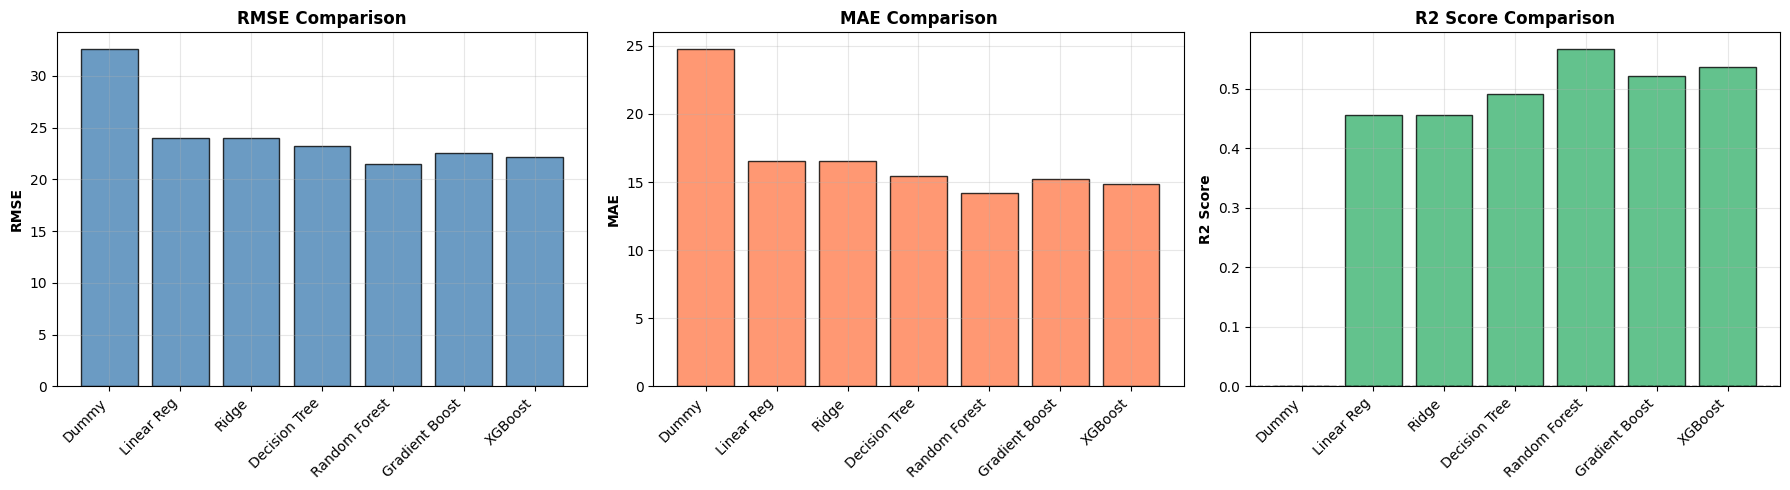


Best Model: Random Forest
RMSE: 21.4414
MAE: 14.1915
R2 Score: 0.5665


In [28]:
# Model comparison

print("MODEL COMPARISON\n")
print("="*70)

models = ["Dummy", "Linear Reg", "Ridge", "Decision Tree", "Random Forest", "Gradient Boost", "XGBoost"]
rmse_scores = [dummy_rmse, lr_rmse, ridge_rmse, dt_rmse, rf_rmse, gb_rmse, xgb_rmse]
mae_scores = [dummy_mae, lr_mae, ridge_mae, dt_mae, rf_mae, gb_mae, xgb_mae]
r2_scores = [dummy_r2, lr_r2, ridge_r2, dt_r2, rf_r2, gb_r2, xgb_r2]

comparison_df = pd.DataFrame({
    'Model': models,
    'RMSE': rmse_scores,
    'MAE': mae_scores,
    'R2 Score': r2_scores
})

print(comparison_df.to_string(index=False))

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].bar(range(len(models)), rmse_scores, color='steelblue', alpha=0.8, edgecolor='black')
axes[0].set_xticks(range(len(models)))
axes[0].set_xticklabels(models, rotation=45, ha='right')
axes[0].set_ylabel('RMSE', fontweight='bold')
axes[0].set_title('RMSE Comparison', fontweight='bold')
axes[0].grid(alpha=0.3)

axes[1].bar(range(len(models)), mae_scores, color='coral', alpha=0.8, edgecolor='black')
axes[1].set_xticks(range(len(models)))
axes[1].set_xticklabels(models, rotation=45, ha='right')
axes[1].set_ylabel('MAE', fontweight='bold')
axes[1].set_title('MAE Comparison', fontweight='bold')
axes[1].grid(alpha=0.3)

axes[2].bar(range(len(models)), r2_scores, color='mediumseagreen', alpha=0.8, edgecolor='black')
axes[2].set_xticks(range(len(models)))
axes[2].set_xticklabels(models, rotation=45, ha='right')
axes[2].set_ylabel('R2 Score', fontweight='bold')
axes[2].set_title('R2 Score Comparison', fontweight='bold')
axes[2].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

best_idx = np.argmax(r2_scores)
print(f"\nBest Model: {models[best_idx]}")
print(f"RMSE: {rmse_scores[best_idx]:.4f}")
print(f"MAE: {mae_scores[best_idx]:.4f}")
print(f"R2 Score: {r2_scores[best_idx]:.4f}")


* Here, we have compiled the RSME, MAE, and R2 scores of all the models we have used.
* and in the charts, we are easily able to compate the scores of all models
* then based on R2 score, we have decided, that the best model will be Random forest

## Feature importance analysis for Random forest 

Feature Importance Analysis


Top 15 Most Important Features:
                feature  importance
   theater_avg_audience    0.593445
            day_of_week    0.078840
            day_of_year    0.050007
                    day    0.042329
theater_median_audience    0.037026
          total_tickets    0.034451
   theater_std_audience    0.032777
           week_of_year    0.027054
   theater_max_audience    0.024715
        booknow_tickets    0.018810
                  month    0.007992
           theater_area    0.007895
   theater_min_audience    0.006749
                   year    0.006315
               latitude    0.006122


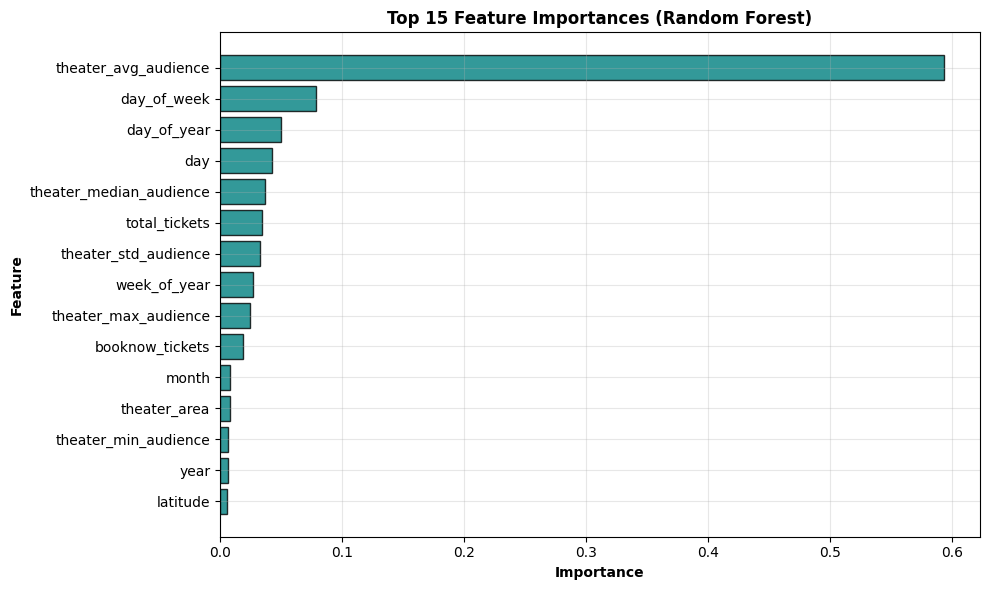

In [29]:
# check which features the Random Forest model relied on the most while making predictions.

print("Feature Importance Analysis\n")
print("="*70)

# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X.columns,                 # list of all feature names
    'importance': rf.feature_importances_ # After training, Random Forest stores how important each feature was while splitting trees and making predictions.
}).sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15).to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='teal', alpha=0.8, edgecolor='black')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance', fontweight='bold')
plt.ylabel('Feature', fontweight='bold')
plt.title('Top 15 Feature Importances (Random Forest)', fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Hyperparameter Tuning

## Random Forest Tuning

| Parameter                                | Meaning                                                                  |
| ---------------------------------------- | ------------------------------------------------------------------------ |
| `RandomizedSearchCV`                     | A tool that searches best hyperparameters randomly.                      |
| `estimator=rf_base`                      | The model we want to tune → Random Forest.                               |
| `param_distributions=param_dist_rf_fast` | Tries values defined in dictionary.                                      |
| `n_iter=8`                               | Tests 8 random combinations from the list.                               |
| `scoring='neg_root_mean_squared_error'`  | Evaluates performance using RMSE. *(negative because sklearn minimizes)* |
| `cv=3`                                   | 3-fold cross validation — trains & tests 3 times for reliability.        |
| `verbose=1`                              | Prints progress on screen.                                               |
| `n_jobs=-1`                              | Uses all CPU cores.                                                      |
| `random_state=42`                        | Ensures repeatable tuning results.                                       |
| `RandomForestRegressor()` | Creates a base Random Forest model.          |
| `random_state=42`         | Makes results repeatable (fixed randomness). |
| `n_jobs=-1`               | Uses all CPU cores → faster training.        |


In [30]:
# Hyperparameter Tuning - Random Forest 

print("Hyperparameter Tuning - Random Forest\n")
print("-" * 70)

param_dist_rf_fast = {
    'n_estimators': [80, 120],        # Number of trees in the forest — testing 80 & 120.
    'max_depth': [10, 15],            # How deep each tree can grow — testing depth 10 & 15.
    'min_samples_split': [5, 10],     # Minimum samples needed to split a node — controls overfitting.
    'min_samples_leaf': [2, 4],       # Minimum samples in a leaf — prevents tiny, weak splits.
    'max_features': ['sqrt', 0.7]     # Number of features used per split — 'sqrt' or 70% of features.
}

# Creates a base Random Forest model, Makes results repeatable (fixed randomness), Uses all CPU cores → faster training
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

rf_random_search = RandomizedSearchCV(
    estimator=rf_base,  # The model we want to tune → Random Forest.
    param_distributions=param_dist_rf_fast,  
    n_iter=8,              # 8 combos × 3 folds = 24 fits. Tests 8 random combinations from the list.
    scoring='neg_root_mean_squared_error', # Evaluates performance using RMSE. (negative because sklearn minimizes)
    cv=3,                    # 3-fold cross validation — trains & tests 3 times for reliability.
    verbose=1,             # Prints progress on screen.
    n_jobs=-1,                 # Uses all CPU cores
    random_state=42            # Ensures repeatable tuning results.
)

# Starts training 8 model versions using different parameter combos
rf_random_search.fit(X, y)
# save the best-performing Random Forest model.
best_rf = rf_random_search.best_estimator_

print("\nBest RF Parameters:")
print(rf_random_search.best_params_)
print(f"Best RF CV RMSE: {-rf_random_search.best_score_:.4f}")

Hyperparameter Tuning - Random Forest

----------------------------------------------------------------------
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best RF Parameters:
{'n_estimators': 120, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}
Best RF CV RMSE: 23.5881


Takes around 10-12 mins to complete the hyperparameter tuning

### I’m planning to tune XGBoost too because:

1. **XGBoost usually performs extremely well on tabular datasets, often even better than Random Forest once tuned.**  
   It has a strong track record in many prediction tasks, so it’s worth giving it the same level of optimization to see its true potential.

2. **XGBoost benefits a lot more from hyperparameter tuning compared to Random Forest.**  
   While Random Forest works pretty well with default settings, XGBoost’s performance can jump significantly when parameters like learning rate, depth, and sampling ratios are tuned properly.

3. **Boosting models can capture more complex or subtle patterns than bagged models like Random Forest.**  
   Since boosting builds each tree by correcting mistakes from the previous ones, it can learn deeper interactions in the data — which might help in a forecasting problem like this.

After tuning both models, we’ll compare them fairly, and whichever one performs better after tuning will be the model we use.


## XGBoost Tuning

In [31]:
# Hyperparameter Tuning - XGBoost

print("Hyperparameter Tuning - XGBoost\n")

param_dist_xgb_fast = {
    'max_depth': [5, 7, 10],           # Controls how deep each tree can be
    'learning_rate': [0.05, 0.1],      # Smaller values = slower learning, but better accuracy. (general range)
    'n_estimators': [150, 250, 350],   # Number of trees in the model.
    'min_child_weight': [1, 3, 5],     # Controls minimum weight in a leaf (affects tree split decisions).
    'subsample': [0.8, 1.0],           # Fraction of training data randomly sampled for each tree.
    'colsample_bytree': [0.7, 1.0],    # Fraction of features used per tree.
}

xgb_base = XGBRegressor(random_state=42, n_jobs=-1)

xgb_random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist_xgb_fast,
    n_iter=10,                         # 10 iterations
    scoring='neg_root_mean_squared_error',
    cv=3,                               # 3 folds = 30 fits
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Use full X, y with cross-validation for tuning
xgb_random_search.fit(X, y)
best_xgb = xgb_random_search.best_estimator_

print("\nBest XGBoost parameters:")
print(xgb_random_search.best_params_)
print(f"\nBest XGBoost CV RMSE: {-xgb_random_search.best_score_:.4f}")


Hyperparameter Tuning - XGBoost

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best XGBoost parameters:
{'subsample': 1.0, 'n_estimators': 250, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.7}

Best XGBoost CV RMSE: 23.3932


Comparitively less time copared to random forest (7-9 mins)

## Tuned Random Forest vs Tuned XGBoost – Findings

After identifying tree-based models as the strongest performers in the initial comparison, I tuned both **Random Forest** and **XGBoost** using `RandomizedSearchCV` with 3-fold cross-validation and RMSE as the scoring metric.

**1. Tuned Random Forest**

- **Best CV RMSE (Random Forest): 23.5881**

This tuned Random Forest is stronger than the default version and captures non-linear relationships reasonably well.

**2. Tuned XGBoost**

- **Best CV RMSE (XGBoost): 23.3932**

The tuned XGBoost model slightly outperforms tuned Random Forest on cross-validation, which is expected for a well-regularized boosting model on structured/tabular data.


**3. Final model choice**

- Both tuned models perform similarly, but **XGBoost (tuned)** achieves a **lower CV RMSE (23.3932 vs 23.5881)**.
- Because:
  - it has the **best cross-validated RMSE**, and  
  - boosting methods (like XGBoost) are designed to correct previous errors sequentially and often generalize better when properly tuned,
- Thefore, I am selecting **tuned XGBoost (`best_xgb`) as the final model** for validation evaluation and submission.


# Prepare Test Data

In [32]:
# Prepare test data with same transformations

print("Preparing test data\n")

# Parse ID column correctly - handle different formats
def parse_id(id_str):
    """Extract theater_id and date from ID string"""
    parts = id_str.split('_')
    theater_id = f"{parts[0]}_{parts[1]}"  # book_00001
    date_str = '_'.join(parts[2:])  # 2024-03-01
    return theater_id, date_str

# Apply parsing
sample_submission['book_theater_id'] = sample_submission['ID'].apply(lambda x: parse_id(x)[0])
sample_submission['show_date'] = sample_submission['ID'].apply(lambda x: parse_id(x)[1])
sample_submission['show_date'] = pd.to_datetime(sample_submission['show_date'])

test_df = sample_submission[['book_theater_id', 'show_date']].copy()

print(f"Test data sample:")
display(test_df.head())

# Apply same feature engineering
test_df = test_df.merge(date_info, on='show_date', how='left')
test_df = test_df.merge(booknow_theaters, on='book_theater_id', how='left')

test_df['year'] = test_df['show_date'].dt.year
test_df['month'] = test_df['show_date'].dt.month
test_df['day'] = test_df['show_date'].dt.day
test_df['day_of_year'] = test_df['show_date'].dt.dayofyear
test_df['week_of_year'] = test_df['show_date'].dt.isocalendar().week
test_df['quarter'] = test_df['show_date'].dt.quarter

test_df = test_df.merge(booknow_booking_agg, on=['book_theater_id', 'show_date'], how='left')
test_df = test_df.merge(cine_booking_agg, on=['book_theater_id', 'show_date'], how='left')

test_df['booknow_tickets'] = test_df['booknow_tickets'].fillna(0)
test_df['booknow_count'] = test_df['booknow_count'].fillna(0)
test_df['cine_tickets'] = test_df['cine_tickets'].fillna(0)
test_df['cine_count'] = test_df['cine_count'].fillna(0)
test_df['total_tickets'] = test_df['booknow_tickets'] + test_df['cine_tickets']
test_df['total_bookings'] = test_df['booknow_count'] + test_df['cine_count']

# Add theater-level features
test_df = test_df.merge(theater_stats, on='book_theater_id', how='left')
test_df['theater_std_audience'] = test_df['theater_std_audience'].fillna(0)

# Fill missing values
test_df['latitude'] = test_df['latitude'].fillna(train_df['latitude'].median())
test_df['longitude'] = test_df['longitude'].fillna(train_df['longitude'].median())
if test_df['theater_area'].isnull().sum() > 0:
    test_df['theater_area'] = test_df['theater_area'].fillna(train_df['theater_area'].mode()[0])

# Fill missing theater stats with overall means
for col in ['theater_avg_audience', 'theater_median_audience', 'theater_std_audience', 
            'theater_max_audience', 'theater_min_audience']:
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(train_df[col].mean())

# Fill missing day_of_week (test dates might be outside training range)
if test_df['day_of_week'].isnull().sum() > 0:
    # Calculate day of week from date
    test_df['day_of_week'] = test_df['day_of_week'].fillna(
        test_df['show_date'].dt.day_name()
    )

# Drop unnecessary columns
test_features = test_df.drop(columns=['show_date', 'book_theater_id'], errors='ignore')

# Encode categorical
for col in categorical_features:
    if col in test_features.columns:
        test_features[col] = test_features[col].astype(str)
        test_features[col] = test_features[col].apply(
            lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1
        )

# Ensure same columns as training
missing_cols = set(X.columns) - set(test_features.columns)
for col in missing_cols:
    test_features[col] = 0

test_features = test_features[X.columns]

print(f"\nTest data shape: {test_features.shape}")
print("Test data prepared successfully")
print(f"\nMissing values in test features: {test_features.isnull().sum().sum()}")


Preparing test data

Test data sample:


,book_theater_id,show_date
0,book_00001,2024-03-01
1,book_00001,2024-03-02
2,book_00001,2024-03-03
3,book_00001,2024-03-04
4,book_00001,2024-03-06



Test data shape: (38062, 22)
Test data prepared successfully

Missing values in test features: 0


# Final Submission

In [33]:
# Make final predictions

print("Making final predictions\n")

# Use the best XGBoost model to predict audience counts for the test set
final_predictions = best_xgb.predict(test_features)
final_predictions = np.maximum(final_predictions, 0)

# Build a submission dataframe with required columns: ID + predicted values
submission = sample_submission[['ID']].copy()
submission['audience_count'] = final_predictions.astype(int)

submission.to_csv('submission.csv', index=False)

# Show a preview of the first few predictions
print("Submission file created: submission.csv")
print(f"\nFirst 10 predictions:")
display(submission.head(10))

print(f"\nPrediction statistics:")
print(f"Mean: {final_predictions.mean():.2f}")
print(f"Median: {np.median(final_predictions):.2f}")
print(f"Min: {final_predictions.min():.2f}")
print(f"Max: {final_predictions.max():.2f}")
print(f"Std: {final_predictions.std():.2f}")

print("\n" + "-"*70)
print("Ready to submit!")

Making final predictions

Submission file created: submission.csv

First 10 predictions:


,ID,audience_count
0,book_00001_2024-03-01,42
1,book_00001_2024-03-02,52
2,book_00001_2024-03-03,57
3,book_00001_2024-03-04,51
4,book_00001_2024-03-06,37
5,book_00001_2024-03-07,43
6,book_00001_2024-03-08,42
7,book_00001_2024-03-09,52
8,book_00001_2024-03-10,59
9,book_00001_2024-03-11,53



Prediction statistics:
Mean: 42.34
Median: 38.14
Min: 4.04
Max: 169.88
Std: 22.64

----------------------------------------------------------------------
Ready to submit!
